
Question 1
	KNN Classifier - accuracy rates for k = 3,5,7,9,11..  
╒══════════╤══════════╤══════════╤══════════╤══════════╤══════════╕
│          │        3 │        5 │        7 │        9 │       11 │
╞══════════╪══════════╪══════════╪══════════╪══════════╪══════════╡
│ Accuracy │ 0.851852 │ 0.777778 │ 0.740741 │ 0.740741 │ 0.703704 │
╘══════════╧══════════╧══════════╧══════════╧══════════╧══════════╛

	Most optimal k value for 2019 stock data is 3 as it seems to have the best accuracy.


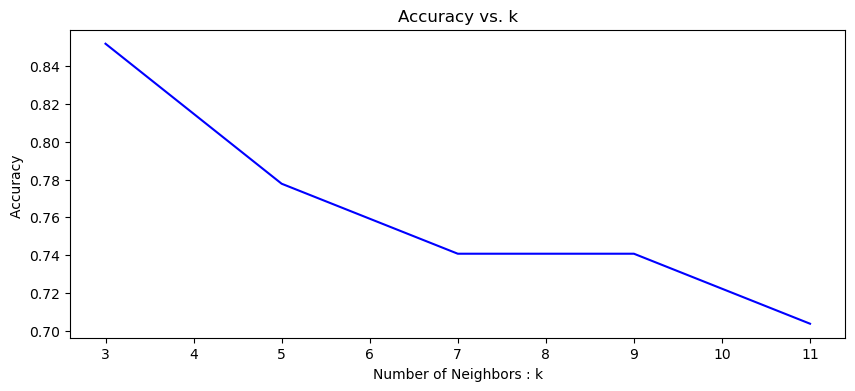


Question 2
	Accuracy of predicting labels using k = 3 on 2020 dataset is 83.0 %

Question 3
	Confusion Matrix for 2020 stock dataset
     0   1
0  28   0
1   9  16

Question 4
	TPR of 2020 dataset is 100.0 TNR of 2020 dataset is 64.0 


Question 5
	 In looking at the confusion matrix it appears that there are no + labels and hence using this predicted label set would yield in no returns. From the earlier assignment, using the true labels would have returned ~150$ which is definitely better than 0!


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn . neighbors import KNeighborsClassifier
from sklearn . preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from tabulate import tabulate

##set default config
pd.set_option('mode.chained_assignment', None)
pd.set_option('display.max_columns', 12)
pd.set_option('display.expand_frame_repr', False)
pd.options.display.float_format = '{:,.2f}'.format

##set filenames
input_dir = os.getcwd()
root_dir = os.getcwd()

labels_file ='BAC_weekly_return_volatility_labels'
labels_path_file = os.path.join(input_dir, labels_file+'.csv')


try:
   labels_df = pd.read_csv(labels_path_file)
   #details_df = pd.read_csv(details_path_file)
except Exception as e:
  print(e)
  print('Failed to read input files', labels_file)


## split dataframe into train and test
stock2019_df = labels_df[labels_df['Year'].isin([2019])]
stock2020_df = labels_df[labels_df['Year'].isin([2020])]

# Question 1 - Run knn on training and plot accuracy
## ID features and class labels
X = stock2019_df[['mean_return','volatility']]
Y = stock2019_df[['label']]
## Apply scaling to X
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
## Split 2019 into training and test            
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.5)

accuracy = []
knn_dict = {}
for k in range(3,13,2):
    knn_classifier = KNeighborsClassifier (n_neighbors =k)
    knn_classifier.fit ( X_train,np.ravel(Y_train ))
    prediction = knn_classifier.predict (X_test )
    accuracy.append(accuracy_score(Y_test,prediction))
    knn_dict[k] = accuracy_score(Y_test,prediction)

## Accuracy grid    
print('\nQuestion 1\n\tKNN Classifier - accuracy rates for k = 3,5,7,9,11..  ')
knn_accuracy_df = pd.DataFrame(knn_dict,index = ['Accuracy'])
knn_accuracy_df = knn_accuracy_df.transpose()
print(tabulate(knn_accuracy_df.T, headers="keys", tablefmt="fancy_grid")) 
print('\n\tMost optimal k value for 2019 stock data is 3 as it seems to have the best accuracy.')

## Accuracy plot for k values
plt.figure( figsize =(10 ,4))
ax = plt. gca ()
ax. xaxis.set_major_locator(plt.MaxNLocator( integer = True ))
plt.plot ([3,5,7,9,11],accuracy , color ='blue')
plt.title ('Accuracy vs. k')
plt.xlabel ('Number of Neighbors : k')
plt.ylabel ('Accuracy ')
plt.show()

# Question 2 - predict 2020 using best value of k
X1 = stock2020_df[['mean_return','volatility']]
Y1 = stock2020_df[['label']]
scaler = StandardScaler().fit(X1)
X1 = scaler.transform(X1)
knn_classifier = KNeighborsClassifier (n_neighbors =3)
knn_classifier.fit ( X_train,np.ravel(Y_train ))
prediction = knn_classifier.predict (X1 )
acc_score = round(accuracy_score(Y1,prediction),2)
print('\nQuestion 2\n\tAccuracy of predicting labels using k = 3 on 2020 dataset is', acc_score*100,'%')

# Question 3 - print confusion matrix
cm=confusion_matrix(Y1,prediction)
cm = pd.DataFrame(cm)
print('\nQuestion 3\n\tConfusion Matrix for 2020 stock dataset\n', cm)

# Question 4 - calculate tpr and tnr
tp = cm[0][0]
tn = cm[1][1]
fp = cm[0][1]
fn = cm[1][0]

tpr = 100*round(tp/(tp+fn),2)
tnr = 100*round(tn/(fp+tn),2)
print('\nQuestion 4\n\tTPR of 2020 dataset is',tpr,'TNR of 2020 dataset is',tnr,'\n')

# Question 5 calculate returns using predicted labels
print('\nQuestion 5\n\t In looking at the confusion matrix it appears that there are no + labels and hence using this predicted label set would yield in no returns. From the earlier assignment, using the true labels would have returned ~150$ which is definitely better than 0!')


